In [1]:
import networkx as nx
import numpy
import matplotlib.pyplot as plt
import pandas
from pandas import DataFrame
from datetime import datetime
import jaydebeapi
import json

In [6]:
BR=pandas.read_csv('C:/projects/mrt/data/BR.csv')
BR

,Unnamed: 0,車站編號,車站名稱,Station,交會路線
0,1,BR24,南港展覽館,Taipei Nangang Exhibition Center,板南線
1,2,BR23,南港軟體園區,Nangang Software Park,NaN
2,3,BR22,東湖,Donghu,民生汐止線
3,4,BR21,葫洲,Huzhou,NaN
4,5,BR20,大湖公園,Dahu Park,NaN
5,6,BR19,內湖,Neihu,NaN
6,7,BR18,文德（碧湖公園）,Wende(Bihu Park),NaN
7,8,BR17,港墘,Gangqian,NaN
8,9,BR16,西湖（德明科大）,Xihu(Takming University),NaN
9,10,BR15,劍南路（美麗華）,Jiannan Road(Miramar),環狀線


In [37]:
graph=nx.Graph()
graph.add_nodes_from(list(range(BR.shape[0])),color='brown')

Graph with 24 nodes and 0 edges


In [16]:
node_names={}
a={}
for i in range(len(BR)):
    a={('%s') %BR.index[i] : ('%s') %BR['車站名稱'][i]}
    node_names.update(a)
    #print(a)
node_names

{'0': '南港展覽館',
 '1': '南港軟體園區',
 '2': '東湖',
 '3': '葫洲',
 '4': '大湖公園',
 '5': '內湖',
 '6': '文德（碧湖公園）',
 '7': '港墘',
 '8': '西湖（德明科大）',
 '9': '劍南路（美麗華）',
 '10': '大直（實踐大學）',
 '11': '松山機場',
 '12': '中山國中',
 '13': '南京復興',
 '14': '忠孝復興',
 '15': '大安',
 '16': '科技大樓',
 '17': '六張犁',
 '18': '麟光',
 '19': '辛亥',
 '20': '萬芳醫院',
 '21': '萬芳社區',
 '22': '木柵',
 '23': '動物園'}

In [43]:
for i in range(0,(BR.shape[0])-1):
    graph.add_edge(i,i+1,weight=10)
print(graph)

Graph with 25 nodes and 24 edges


In [33]:
BR_new = BR[BR['交會路線'].notnull()]

for j in range(BR_new.shape[0]):
    weight=(BR_new['交會路線'].iloc[j].count(" "))+1
    print(BR_new['交會路線'].iloc[j], weight)
    


板南線 1
民生汐止線 1
環狀線 1
民生汐止線：北大台北校區站（站外轉乘） 1
松山新店線 1
板南線 1
淡水信義線 1
環狀線 深坑輕軌（站外轉乘） 貓空纜車（站外轉乘） 3


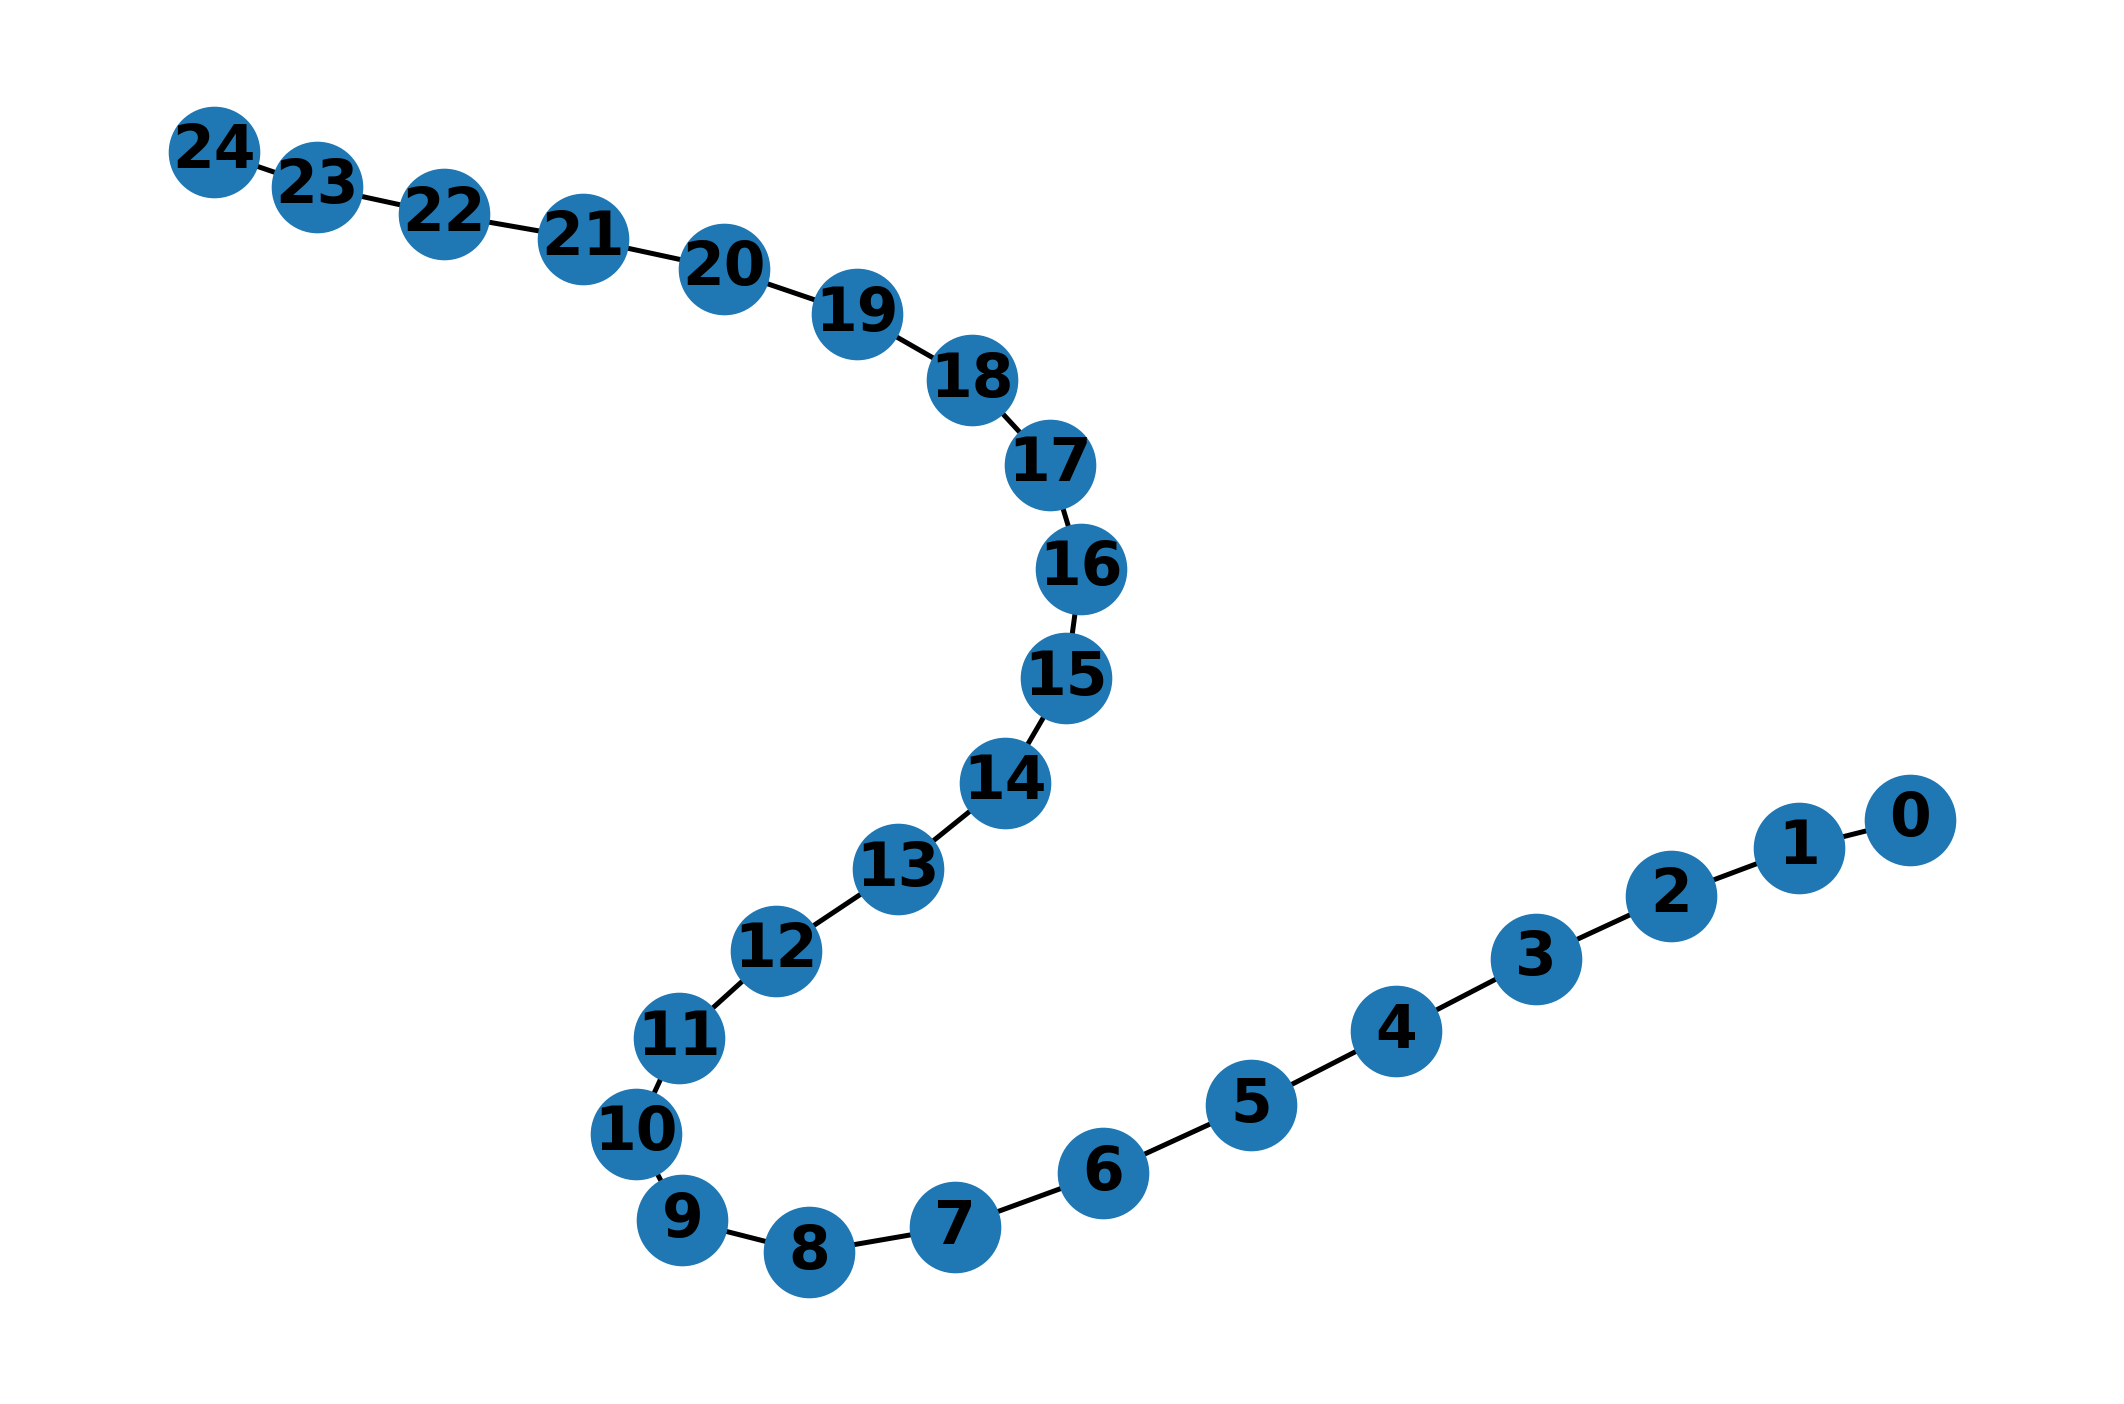

In [48]:
fig,ax=plt.subplots(dpi=360)
nx.draw(graph, with_labels=True, font_weight='bold')
fig.tight_layout()
plt.show()